In [227]:
# Importando o pandas para explorar os dados
import pandas as pd

# Trabalhando com datas 
import datetime as dt

# Usada para criar visões
import seaborn as sns
import matplotlib.pyplot as plt
import mplcyberpunk
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.dates as mdates

# Criacao de PDF
from fpdf import FPDF

In [228]:
df = pd.read_csv(r'bases/tratadas/exportacao_15_anos_tratada.csv', sep=';')
df.head(10)

,pais_origem,pais_destino,quantidade_litro,valor,categorias,ano_exportado
0,Brasil,"Alemanha, República Democrática",265742.0,429970.0,Vinhos de mesa,2008
1,Brasil,Angola,25721.0,71083.0,Vinhos de mesa,2008
2,Brasil,Antilhas Holandesas,17938.0,22908.0,Vinhos de mesa,2008
3,Brasil,Austrália,218726.0,99280.0,Vinhos de mesa,2008
4,Brasil,Bélgica,3523.0,12969.0,Vinhos de mesa,2008
5,Brasil,Benin,10350.0,17423.0,Vinhos de mesa,2008
6,Brasil,Bolívia,3979.0,3990.0,Vinhos de mesa,2008
7,Brasil,Canadá,20949.0,80476.0,Vinhos de mesa,2008
8,Brasil,China,8689.0,25926.0,Vinhos de mesa,2008
9,Brasil,Cingapura,1233.0,4699.0,Vinhos de mesa,2008


In [229]:
df['paises'] = 1
df_group = df[['quantidade_litro', 'valor', 'paises','categorias', 'ano_exportado']]\
    .groupby(['ano_exportado','categorias']).sum().reset_index()

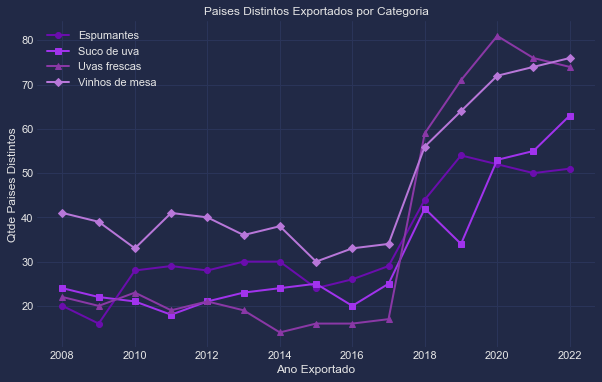

In [230]:
plt.style.use("cyberpunk")

# Reformatar os dados para que as categorias se tornem colunas
df_pivot = df_group.pivot(index='ano_exportado', columns='categorias', values='paises')

# Cores de roxo diferentes
cores = ['#6A0DAD', '#A133ED', '#8A38A6', '#B877D9']

# Estilos de marcadores diferentes
marcadores = ['o', 's', '^', 'D']

# Criar o gráfico de linha
plt.figure(figsize=(10, 6))
for i, categoria in enumerate(df_pivot.columns):
    plt.plot(df_pivot.index, df_pivot[categoria], label=categoria, color=cores[i], marker=marcadores[i], linewidth=2) 

# Configurar o título e os rótulos dos eixos
plt.title('Paises Distintos Exportados por Categoria')
plt.xlabel('Ano Exportado')
plt.ylabel('Qtde Paises Distintos')
plt.legend()

# Exporta a imagem para ser usada no relatorio
plt.savefig('imagens/exportacao_paises_categ.png', dpi = 300)

# Mostrar o gráfico
plt.show()

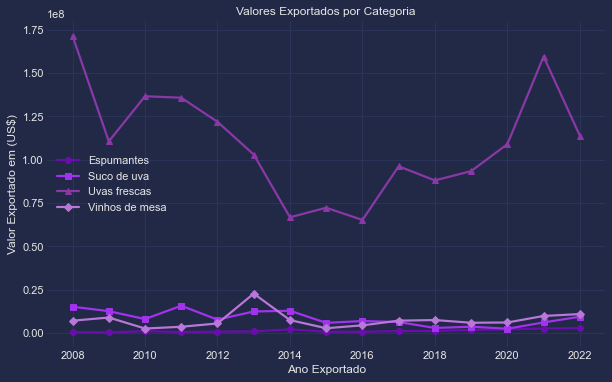

In [231]:
plt.style.use("cyberpunk")

# Reformatar os dados para que as categorias se tornem colunas
df_pivot = df_group.pivot(index='ano_exportado', columns='categorias', values='valor')

# Cores de roxo diferentes
cores = ['#6A0DAD', '#A133ED', '#8A38A6', '#B877D9']

# Estilos de marcadores diferentes
marcadores = ['o', 's', '^', 'D']

# Criar o gráfico de linha
plt.figure(figsize=(10, 6))
for i, categoria in enumerate(df_pivot.columns):
    plt.plot(df_pivot.index, df_pivot[categoria], label=categoria, color=cores[i], marker=marcadores[i], linewidth=2.2) 

# Configurar o título e os rótulos dos eixos
plt.title('Valores Exportados por Categoria')
plt.xlabel('Ano Exportado')
plt.ylabel('Valor Exportado em (US$)')
plt.legend()

# Exporta a imagem para ser usada no relatorio
plt.savefig('imagens/exportacao_valores_categ.png', dpi = 300)

# Mostrar o gráfico
plt.show()

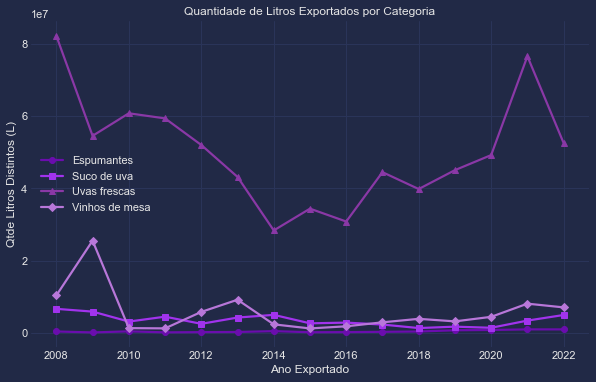

In [232]:
plt.style.use("cyberpunk")

# Reformatar os dados para que as categorias se tornem colunas
df_pivot = df_group.pivot(index='ano_exportado', columns='categorias', values='quantidade_litro')

# Cores de roxo diferentes
cores = ['#6A0DAD', '#A133ED', '#8A38A6', '#B877D9']

# Estilos de marcadores diferentes
marcadores = ['o', 's', '^', 'D']

# Criar o gráfico de linha
plt.figure(figsize=(10, 6))
for i, categoria in enumerate(df_pivot.columns):
    plt.plot(df_pivot.index, df_pivot[categoria], label=categoria, color=cores[i], marker=marcadores[i], linewidth=2.2) 

# Configurar o título e os rótulos dos eixos
plt.title('Quantidade de Litros Exportados por Categoria')
plt.xlabel('Ano Exportado')
plt.ylabel('Qtde Litros Distintos (L)')
plt.legend()

# Exporta a imagem para ser usada no relatorio
plt.savefig('imagens/exportacao_litros_categ.png', dpi = 300)

# Mostrar o gráfico
plt.show()

In [233]:
# Importando biblioteca BACEN (banco central)
from bcb import currency
from bcb import sgs

# Extraindo os dados da SELIC e IPCA dos ultimos 15 anos
selic = sgs.get({'selic': 432}, start = '2008-01-01')
ipca = sgs.get({'ipca': 433}, start = '2008-01-01')

# Visualizando ambas tabelas
selic.head(), ipca.head()

(            selic
 Date             
 2008-01-01  11.25
 2008-01-02  11.25
 2008-01-03  11.25
 2008-01-04  11.25
 2008-01-05  11.25,
             ipca
 Date            
 2008-01-01  0.54
 2008-02-01  0.49
 2008-03-01  0.48
 2008-04-01  0.55
 2008-05-01  0.79)

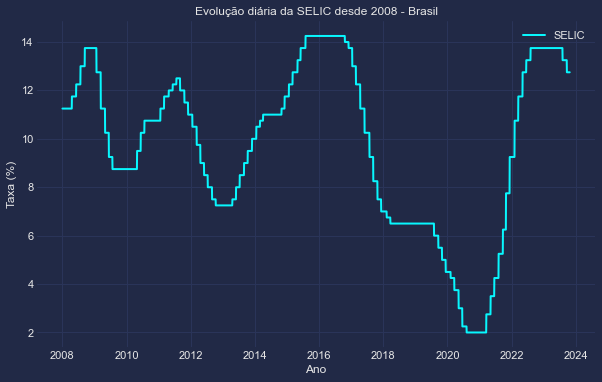

In [234]:
# Criando grafico de SELIC ao longo do tempo
plt.style.use("cyberpunk")
plt.figure(figsize=(10, 6))

# Plote as séries IPCA e SELIC
plt.plot(selic.index, selic['selic'], label='SELIC', linewidth=2)

# Configurar rótulos e título
plt.xlabel('Ano')
plt.ylabel('Taxa (%)')
plt.title('Evolução diária da SELIC desde 2008 - Brasil')

# Adicione uma legenda
plt.legend()

# Exporta a imagem para ser usada no relatorio
plt.savefig('imagens/selic.png', dpi = 300)

# Mostrar o gráfico
plt.show()

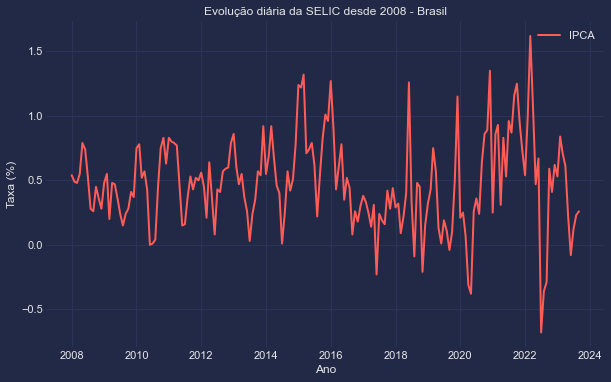

In [235]:
# Criando grafico de SELIC ao longo do tempo
plt.style.use("cyberpunk")
plt.figure(figsize=(10, 6))

# Plote as séries IPCA e SELIC
plt.plot(ipca.index, ipca['ipca'], label='IPCA', linewidth=2, color='#FF5C57')

# Configurar rótulos e título
plt.xlabel('Ano')
plt.ylabel('Taxa (%)')
plt.title('Evolução diária da SELIC desde 2008 - Brasil')

# Adicione uma legenda
plt.legend()

# Exporta a imagem para ser usada no relatorio
plt.savefig('imagens/ipca.png', dpi = 300)

# Mostrar o gráfico
plt.show()

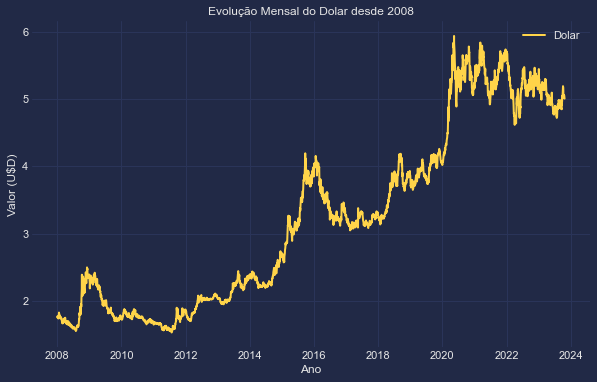

In [236]:
# Importas dolar desde 2008 para podermos comparar 
dolar = currency.get('USD', start='2008-01-01', end=dt.datetime.now())

# Criando grafico de SELIC ao longo do tempo
plt.style.use("cyberpunk")
plt.figure(figsize=(10, 6))

# Plote as séries IPCA e SELIC
plt.plot(dolar.index, dolar['USD'], label='Dolar', linewidth=2, color='#FFD449')

# Configurar rótulos e título
plt.xlabel('Ano')
plt.ylabel('Valor (U$D)')
plt.title('Evolução Mensal do Dolar desde 2008')

# Adicione uma legenda
plt.legend()

# Exporta a imagem para ser usada no relatorio
plt.savefig('imagens/dolar.png', dpi = 300)

# Mostrar o gráfico
plt.show()

In [237]:
# Top 10 paises mais exportados
df_group_paises = df[['pais_destino','quantidade_litro','valor']].groupby(by=['pais_destino']).sum().reset_index()\
    .sort_values(by=['valor'], ascending=False)\
    .head(10)

In [238]:
df_group_paises

,pais_destino,quantidade_litro,valor
148,Países Baixos,344276472.0,707416108.0
157,Reino Unido,175361383.0,401437194.0
71,Estados Unidos,124900694.0,298758056.0
110,Japão,39541321.0,102388305.0
3,"Alemanha, República Democrática",27117008.0,55801640.0
147,Paraguai,31266427.0,42173106.0
10,Argentina,19465462.0,36643245.0
138,Noruega,11350154.0,31126284.0
160,Romênia,13194830.0,28569808.0
70,Espanha,13581981.0,25928936.0


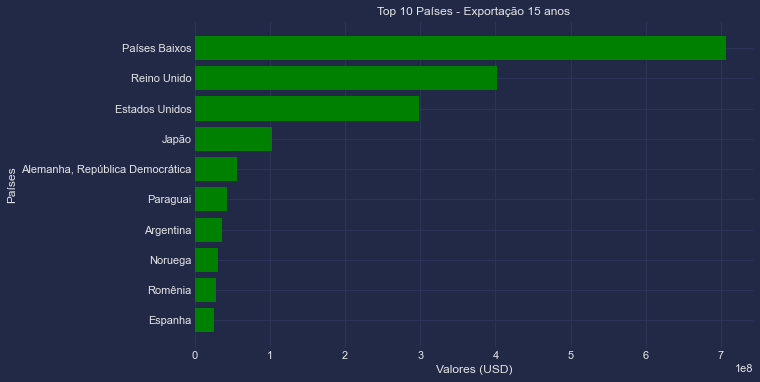

<Figure size 432x288 with 0 Axes>

In [239]:
# Crie um gráfico de barras
plt.figure(figsize=(10, 6))
barras = plt.barh(df_group_paises.pais_destino, df_group_paises.valor, color='green')

# Remover as bordas das barras
for barra in barras:
    barra.set_edgecolor('none')

# Configure rótulos e título
plt.xlabel('Valores (USD)')
plt.ylabel('Países')
plt.title('Top 10 Países - Exportação 15 anos')

# Inverter a ordem dos países (maior no topo)
plt.gca().invert_yaxis()

# Mostrar o gráfico
plt.show()

# Exporta a imagem para ser usada no relatorio
plt.savefig('imagens/top_10_paises.png', dpi = 300)

# Mostrar o gráfico
plt.show()

In [137]:
df = pd.read_csv(r'bases/df_comercializacao_15_anos.csv', sep=';')

In [144]:
# Filtrar linhas onde a coluna 'produto' contém letras maiúsculas76
df_filtrado = df[df['produto'].str.isupper()]
df_filtrado

,produto,quantidade_litro,ano
0,VINHO DE MESA,200.488.612,2008
4,VINHO FINO DE MESA,23.167.738,2008
8,VINHO FRIZANTE,441.691,2008
9,VINHO ORGÂNICO,-,2008
10,VINHO ESPECIAL,65,2008
...,...,...,...
878,VINHO ESPECIAL,-,2022
882,ESPUMANTES,31.242.697,2022
886,SUCO DE UVAS,147.753.321,2022
891,SUCO DE UVAS CONCENTRADO,26.730.942,2022
